## Instalar paquetes necesarios Yolo

In [1]:
!pip install -q inference-gpu[yolo-world]==0.9.12rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.0/301.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.9/746.9 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 80.4 MB/s eta 0:00:00
   ━

In [2]:
!pip install -q supervision==0.19.0rc3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 3.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-sdk 0.15.1 requires supervision<1.0.0,>=0.20.0, but you have supervision 0.19.0rc3 which is incompatible.


In [3]:
import cv2
import pandas as pd
import supervision as sv
import os
from pathlib import Path

from tqdm import tqdm
from inference.models.yolo_world.yolo_world import YOLOWorld

# Se traen las librerias del google para realizar la conexion con el drive
from google.colab import files
from google.colab import drive

[07/31/24 00:33:55] WARNING  Your inference package version 0.9.12rc1 is out of date! Please upgrade ]8;id=529187;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=372015;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py#35\35]8;;\
                             to version 0.15.1 of inference for the latest features and bug fixes by               
                             running `pip install --upgrade inference`.                                            

In [4]:
drive.mount("/content/drive") # Se realiza la peticion para conexion a la cuenta de google drive

Mounted at /content/drive


In [5]:
pathOrigen = r"/content/drive/MyDrive/Diversa/imagenes".replace("\\","/")
path_destino = r"/content/drive/MyDrive/Diversa/ResultadoImagenesObject".replace("\\","/")

## Ejecutar la detección de objetos





In [6]:
model = YOLOWorld(model_id="yolo_world/l")

YOLO-World es un modelo de disparo cero, que permite la detección de objetos sin ningún tipo de entrenamiento. Sólo es necesario definir un prompt como una lista de clases (cosas) que se están buscando.

In [15]:
classes = ["bench","Damaged","bridge","Old Window","sidewalk","pole utility","building commercial","tree","empty-street","lane line solid edge line","person", "motorcycle", "dog", "wires", "House", "home", "street light", "pole", "HV switch", "concrete pole", "concretepole", "cross arm", "crossbar", "light pole", "mid mount pole", "mid mount suitable pole",  "small cell pole", "steel pole", "street light", "timber pole", "top mount pole", "top mount suitable pole", "tr", "traffic light", "traffic pole", "transformer", "unsuitable",
           "bus-station","paradero","busstop", "bicycle","bridgeBot", "bus", "car","Bridges", "construction sign", "crosswalk", "motorcycle", "one way sign", "pedestrian crossing sign", "person", "railroad sign", "stop sign", "street name sign", "traffic light", "truck"]
model.set_classes(classes)

In [20]:
def procesar_imagenes_yolo(path_origen, path_destino):
    # Se crea la carpeta de destino si no existe
    if not os.path.exists(path_destino):
        os.makedirs(path_destino)

    # Lista para almacenar los resultados de las detecciones
    detecciones_lista = []

    # Obtiene todas las imágenes en el directorio de origen
    imagenes = [f for f in os.listdir(path_origen) if os.path.isfile(os.path.join(path_origen, f))]

    for imagen in imagenes:
        imagen_path = os.path.join(path_origen, imagen)
        image = cv2.imread(imagen_path)

        # Realizar la inferencia utilizando el modelo YOLO
        results = model.infer(image)
        detections = sv.Detections.from_inference(results)

        # Anotadores para las cajas y etiquetas
        BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator(thickness=2)
        LABEL_ANNOTATOR = sv.LabelAnnotator(text_thickness=2, text_scale=1, text_color=sv.Color.BLACK)

        # Se crea una copia de la imagen original para anotarla
        annotated_image = image.copy()
        annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
        annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)

        # Se guarda la imagen anotada en el directorio de destino
        imagen_destino_path = os.path.join(path_destino, imagen)
        cv2.imwrite(imagen_destino_path, annotated_image)

        # Almacenar los resultados de las detecciones en una lista
        for detection in detections:
            # Suponiendo que detection es una tupla (x1, y1, x2, y2, confianza, etiqueta)
            x1, y1, x2, y2, confianza, etiqueta = detection
            detecciones_lista.append({
                'imagen': imagen,
                'x1': x1,
                'y1': y1,
                'x2': x2,
                'y2': y2,
                'confianza': confianza,
                'etiqueta': etiqueta
            })
    sv.plot_image(annotated_image, (10, 10))

    # Crear un DataFrame con los resultados de las detecciones
    df_detecciones = pd.DataFrame(detecciones_lista)

    # Guarda el DataFrame en un archivo CSV (los resultados se guardan en el path final de google drive)
    df_detecciones.to_csv(path_destino+'/ObjectDetected.csv', index=False)

    return df_detecciones

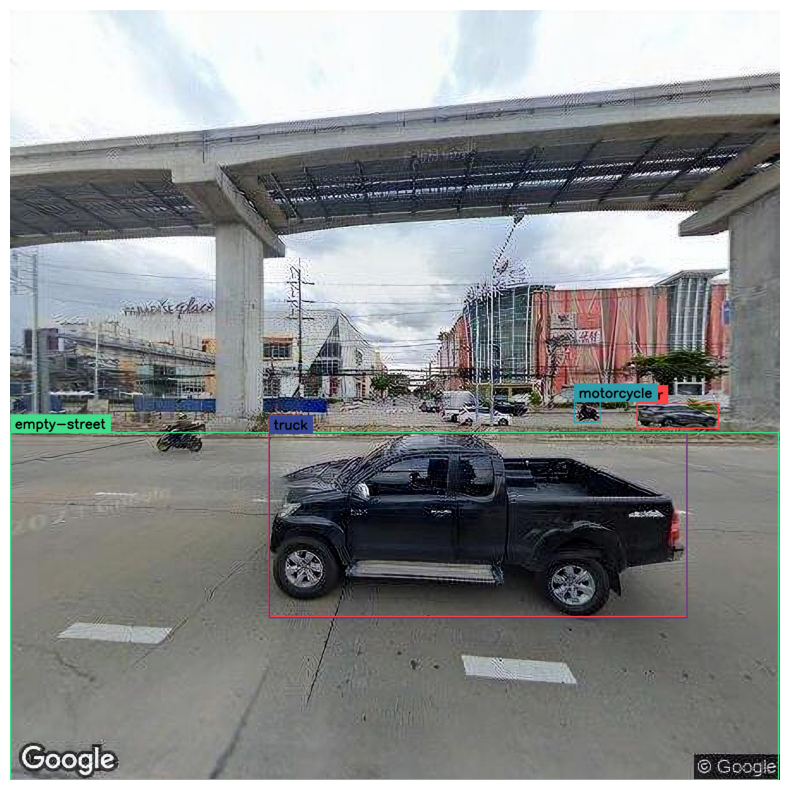

In [21]:
df_resultados = procesar_imagenes_yolo(pathOrigen, path_destino)

La imagen anterior, es solo para verificar los resultados arrojados por el modelo yolo-wolrd

In [22]:
df_resultados

,imagen,x1,y1,x2,y2,confianza,etiqueta
0,streetview_769_270_sr.jpg,"[133.12081909179688, 926.308837890625, 415.142...",None,0.764822,43,None,{'class_name': 'car'}
1,streetview_772_270_sr.jpg,"[539.6922607421875, 971.7008056640625, 1413.40...",None,0.866278,43,None,{'class_name': 'car'}
2,streetview_786_90_sr.jpg,"[0.09222412109375, 714.5768737792969, 955.0274...",None,0.606337,14,None,{'class_name': 'House'}
3,streetview_825_90_sr.jpg,"[602.2651672363281, 984.9119567871094, 1574.64...",None,0.731119,43,None,{'class_name': 'car'}
4,streetview_825_90_sr.jpg,"[603.4756469726562, 985.7266540527344, 1575.02...",None,0.636286,55,None,{'class_name': 'truck'}
5,streetview_825_90_sr.jpg,"[1.3251953125, 983.0135803222656, 1788.8995361...",None,0.531053,8,None,{'class_name': 'empty-street'}
6,streetview_825_90_sr.jpg,"[1459.31494140625, 915.3431091308594, 1648.348...",None,0.494867,43,None,{'class_name': 'car'}
7,streetview_825_90_sr.jpg,"[1313.1585083007812, 911.4061279296875, 1373.4...",None,0.492843,11,None,{'class_name': 'motorcycle'}
